In [10]:
from sqlalchemy import create_engine
import pandas as pd

db_user = 'root'
db_password = 'farabi68'
db_host = 'localhost'
db_port = 3306
db_name = 'board_games'

engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
connection = engine.connect()

In [15]:
connection.rollback()

In [16]:
rating_freq_df = pd.read_sql(sql="SELECT * FROM board_games.games_rounded_reviews_frequency", con=connection)
rating_freq_df.columns

Index(['id', 'name', 'rating', 'frequency'], dtype='object')

In [17]:
total_ratings_per_game = rating_freq_df.groupby('name')['frequency'].sum().reset_index()
largest_game = total_ratings_per_game.loc[total_ratings_per_game['frequency'].idxmax()]['name']

largest_game_data = rating_freq_df[rating_freq_df['name'] == largest_game]
total_ratings = largest_game_data['frequency'].sum()
largest_game_data.loc[:, 'probability'] = largest_game_data['frequency'] / total_ratings

C:\Users\Amina\AppData\Local\Temp\ipykernel_5168\1884082966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largest_game_data.loc[:, 'probability'] = largest_game_data['frequency'] / total_ratings


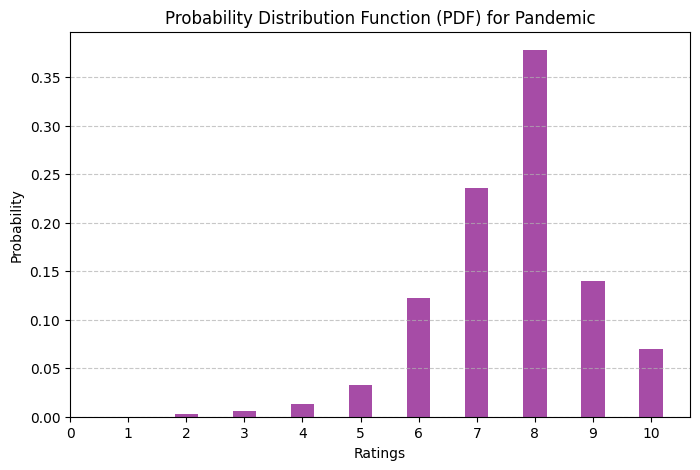

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(
    largest_game_data['rating'], 
    largest_game_data['probability'], 
    color='purple', 
    width=0.4, 
    alpha=0.7
)

plt.title(f'Probability Distribution Function (PDF) for {largest_game}')
plt.xlabel('Ratings')
plt.ylabel('Probability')
plt.xticks(range(0, 11))  # Ratings are between 0 and 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()